In [2]:
import numpy as np
import sys

from matplotlib import pyplot as plt

headerdt = np.dtype([
	("startOffset", "<i8"),
	("descSpan", "<i8"),
	("preTrigger", "<i8"),
	("postTrigger", "<i8"),
	("fractBase", "<i8")
])

syncposdt = np.dtype([
	("w", "<i8"),
	("f", "<u1")
])

def loadrec(file):
	head = np.frombuffer(file.read(headerdt.itemsize), dtype=headerdt)[0]
	samples = np.frombuffer(file.read((head['preTrigger'] + head['postTrigger']) * head['descSpan']),
					  dtype=np.dtype("(8,)<i2"))
	synclog = np.frombuffer(file.read(), dtype=syncposdt)

	return head, samples, synclog

def edges(rec):
	h, s, p = rec
	num_samples = 5012
	r = [
		(m['w'] - h['startOffset'], float(m['f']) / h['fractBase'])
		for m in p
	]

	return [
		(s[a-num_samples:a+num_samples], np.arange(-num_samples, num_samples) + b)
		for a, b in r
		if a > num_samples and a < len(s) - num_samples
	]


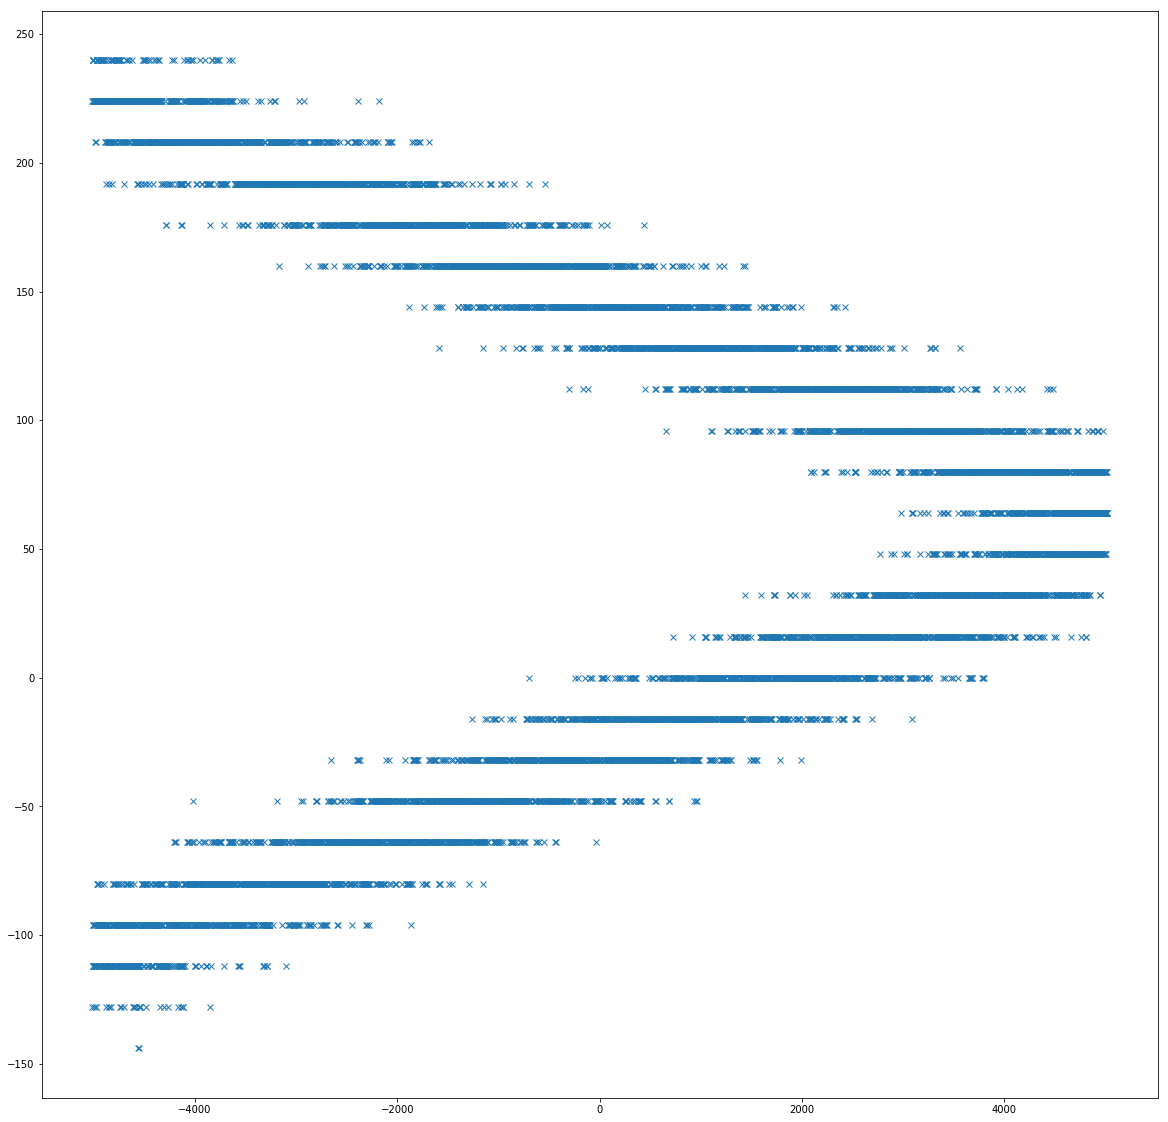

In [5]:
plt.figure(figsize=(20, 20))
path = "/home/kaklik/data_hroch/cosmic/Experiments/2019/07_18_blesky/kaklik_Parallella_Generator/"
try:
    with open(path + "rec_190718-213455.59", 'rb') as f:
        for y, x in edges(loadrec(f)):
            plt.plot(x, y[:,5], 'x')
except:
    pass
#plt.xlim(5, 1)
plt.show()

In [16]:
loadrec(f)

ValueError: read of closed file